<a href="https://colab.research.google.com/github/LjBLincoln/Machine_Learning/blob/master/wx+b_no_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def generate_dataset():
    x_batch = np.linspace(0, 2, 100)
    y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
    return x_batch, y_batch

In [0]:
def linear_regression():
    x = tf.placeholder(tf.float32, shape=(None, ), name='x')
    y = tf.placeholder(tf.float32, shape=(None, ), name='y')
     
    with tf.variable_scope('lreg') as scope:
       w = tf.Variable(np.random.normal(), name='W')
       
       b = tf.Variable(np.random.normal(), name='b')
		
       y_pred = tf.add(tf.multiply(w, x), b)
      
       loss = tf.reduce_mean(tf.square(y_pred - y))
        
    return x, y, y_pred, loss

0 loss: 8.069278
1 loss: 2.5862205
2 loss: 0.84725356
3 loss: 0.29557994
4 loss: 0.12042008
5 loss: 0.06466896
6 loss: 0.046795875
7 loss: 0.040946055
8 loss: 0.03892009
9 loss: 0.038117174
10 loss: 0.037711922
11 loss: 0.037442014
12 loss: 0.037223686
13 loss: 0.037029862
14 loss: 0.036851436
15 loss: 0.036685072
16 loss: 0.036529254
17 loss: 0.036383107
18 loss: 0.036245953
19 loss: 0.03611721
20 loss: 0.03599637
21 loss: 0.03588294
22 loss: 0.03577646
23 loss: 0.03567652
24 loss: 0.035582695
25 loss: 0.03549462
26 loss: 0.03541195
27 loss: 0.035334345
28 loss: 0.0352615
29 loss: 0.035193115
30 loss: 0.03512893
31 loss: 0.03506868
32 loss: 0.035012115
33 loss: 0.034959022
34 loss: 0.034909185
35 loss: 0.0348624
36 loss: 0.034818485
37 loss: 0.03477727
38 loss: 0.03473857
39 loss: 0.034702245
40 loss: 0.03466815
41 loss: 0.03463614
42 loss: 0.034606107
43 loss: 0.03457789
44 loss: 0.034551423
45 loss: 0.03452657
46 loss: 0.034503244
47 loss: 0.034481347
48 loss: 0.034460794
49 loss: 0

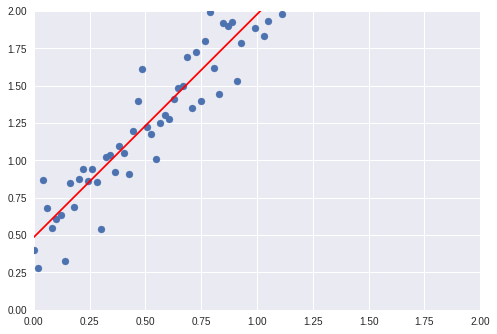

In [5]:
def run():
    x_batch, y_batch = generate_dataset()
    x, y, y_pred, loss = linear_regression()
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    train_op = optimizer.minimize(loss)
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        feed_dict = {x: x_batch, y: y_batch}

        for i in range(100):
            session.run(train_op, feed_dict)
            print(i, "loss:", loss.eval(feed_dict))
        y_pred_batch = session.run(y_pred, {x : x_batch})

    plt.scatter(x_batch, y_batch)
    plt.plot(x_batch, y_pred_batch, color='red')
    plt.xlim(0, 2)
    plt.ylim(0, 2)
    plt.savefig('plot.png')
    
if __name__ == "__main__":
    run()